# Lending Club Case Study

## Table of Content

1. Problem Statement
2. Objectives
3. Data Understanding
4. Loading Data
5. Data Cleaning and Imputation
6. Univariate Analysis
7. Bivariate Analysis
8. Summary

## Problem Statement

Lending Club is a consumer finance company providing various types of loans for the customers who are seeking a loan with investors looking to lend money and make profit from the their invested amount.

Like most other lending companies, *lending loans to ‘risky’* applicants is the highest cause of financial loss *(called credit loss)*. The credit loss is the total amount lost by the lender when the borrower do not pays back or runs away with the money owed. In other words, **borrowers** who **default** cause the largest amount of **loss to the lenders**. In this case, the customers labelled as *'charged-off' are the 'defaulters'*.

The main objective of this case study is to analyise the data provided and come up with constructive data that points out if a applicant is going to default or not.

There are two potential sources of **credit loss** are:
* Applicant 'likely to repay' such an applicant will bring in profit to the company with interest rates and rejecting such applicants will result in loss of business.
* Applicant who are most likley do not replay the loan, i.e. and will potentially default, then approving the loan may lead to a financial loss for the financial institute.


## Objectives

1. The goal of this case study is to to identify these risky loan applicants.
2. If one is able to *identify these risky loan applicants*, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the one of the objective of this case study.
3. In other words, the company wants to understand the driving factors (or driver variables) behind loan default, the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#setting to display all columns
pd.set_option("display.max_columns",150)

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:

df = pd.read_csv(r"loan.csv", low_memory=False)
print('shape:',df.shape)

shape: (39717, 111)


# Data Understanding

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [10]:
df.dtypes.value_counts()

float64    74
object     24
int64      13
Name: count, dtype: int64

In [11]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

#### The loan amount is represented in three columns. 

1. loan_amnt : The listed amount of the loan applied for by the borrower.
2. funded_amnt: The total amount committed to that loan at that point in time.
3. funded_amnt_inv : The total amount committed by investors for that loan at that point in time.

In [13]:
df.loan_status.value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

#### **loan_status** column has three values and fully_paid is the most used value.
1. Fully Paid
2. Charged Off
3. Current

#### Demographic related columns of customer 

1. annual_inc represents the self-reported annual income provided by the borrower during registration.
2. home_ownership represents the home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
3. emp_length represents employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
4. dti represents a ratio calculated using the borrower’s total monthly debt payments on the total debt obligations
5. addr_state represents the state provided by the borrower in the loan application

In [17]:
# annual_inc represents the self-reported annual income provided by the borrower during registration.

df['annual_inc'].value_counts()

annual_inc
60000.0    1505
50000.0    1057
40000.0     876
45000.0     830
30000.0     825
           ... 
56820.0       1
45314.0       1
53913.0       1
62880.0       1
27376.0       1
Name: count, Length: 5318, dtype: int64

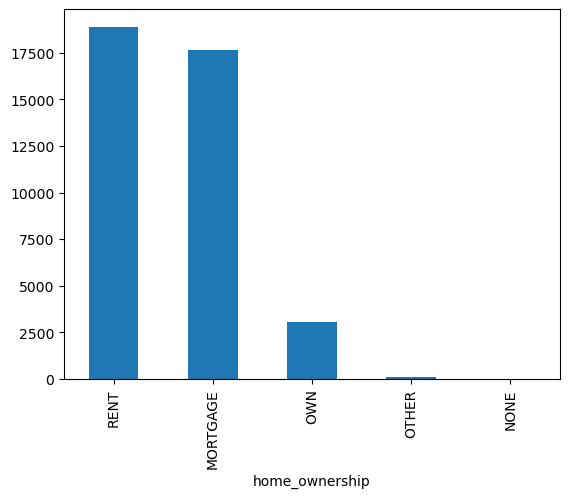

In [18]:
# home_ownership represents the home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

df['home_ownership'].value_counts().plot.bar()
plt.show()

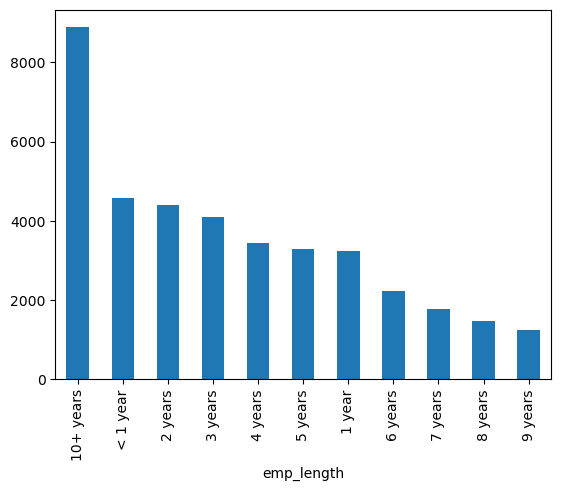

In [19]:
# emp_length represents employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

df['emp_length'].value_counts().plot.bar()
plt.show()

In [20]:
# dti represents a ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, 
# excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

df.dti.value_counts()

dti
0.00     183
12.00     51
18.00     45
19.20     40
13.20     39
        ... 
29.13      1
25.31      1
29.76      1
28.42      1
25.43      1
Name: count, Length: 2868, dtype: int64

### Points to note from customer demographics 

1. Most customers earn 60000.0 per year
2. Most customers live in a rented accommodation and morgage comes close second
3. Most customers stay with one employer for more than 10 years
4. Debt to earnings ratio is 0 for most of the customers
5. Maximum number of customers ae from CA state. 

### **Loan related columns**

1. Loan Ammount : loan_amt , The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
2. Term : term3 The number of payments on the loan. Values are in months and can be either 36 or 60.
3.  Grade : grade LC assigned loan grade
4. 4. Interest Rate : int_r, Interest Rate on the loanate
5. Loan issue Date : issue_d, The month which the loan was fundedate
6. Purpose of Loan : purpo, A category provided by the borrower for the loan request. se 
7. Installment  : installm, The monthly payment owed by the borrower if the loan originates.ent
10. Public Records : public_rec  - Derogatory Public Records. The value adds to the risk to the loan. Higher the value, lower the success rate.
11. Public Records Bankruptcy  (public_rec_bankruptcy) - Number of bankruptcy records publocally available for the customer. Higher the value, lower is the success rate.
12. Verification Status : verification_status

### Row analysis

1. Summary Rows: There are no summary rows present in the csv file2. 
Header & Footer Rows -there are no header or footer rows in the csv file
3. Columnn numbers s - No column number, indicators etc. found ithe csv filee

In [25]:
# dropping the rows with loan status is current as these rows would not contribute to the analysis. 

len(df[df.loan_status=='Current'])

1140

In [26]:
df = df[df.loan_status!='Current']
len(df)

## removed 1140 from 39717 rows and the remaining rows are 38577

print("Percentage of rows dropped = ", round((39717 - 38577)/39717*100,2),"%")

Percentage of rows dropped =  2.87 %


In [27]:
# find and removing duplicate rows in the dataframe

duplicate_rows = df[df.duplicated()]

if len(duplicate_rows)>=0:
    print(len(duplicate_rows))
    print('No duplicates in the dataframe')
else:
    print('operate to remove duplicate rows')
    

0
No duplicates in the dataframe


### Column analysis and clean up

#### Drop Columns 

1. All the columns with NA values should be dropped as this will not help in analysis.
2. There are 55 columns with all NA values. Columns that should be dropped are 
    (next_pymnt_d, mths_since_last_major_derog, annual_inc_joint, dti_joint, verification_status_joint, tot_coll_amt, tot_cur_bal, open_acc_6m, open_il_6m, open_il_12m, open_il_24m, mths_since_rcnt_il, total_bal_il, il_util, open_rv_12m, open_rv_24m, max_bal_bc, all_util, total_rev_hi_lim, inq_fi, total_cu_tl, inq_last_12m, acc_open_past_24mths, avg_cur_bal, bc_open_to_buy, bc_util, mo_sin_old_il_acct, mo_sin_old_rev_tl_op, mo_sin_rcnt_rev_tl_op, mo_sin_rcnt_tl, mort_acc, mths_since_recent_bc, mths_since_recent_bc_dlq, mths_since_recent_inq, mths_since_recent_revol_delinq, num_accts_ever_120_pd, num_actv_bc_tl, num_actv_rev_tl, num_bc_sats, num_bc_tl, num_il_tl, num_op_rev_tl, num_rev_accts, num_rev_tl_bal_gt_0, num_sats, num_tl_120dpd_2m, num_tl_30dpd, num_tl_90g_dpd_24m, num_tl_op_past_12m, pct_tl_nvr_dlq, percent_bc_gt_75, tot_hi_cred_lim, total_bal_ex_mort, total_bc_limit, total_il_high_credit_limit)
   
3. All the columns with zero values should be dropped.
5. The columns where more than 65% of data is empty (mths_since_last_delinq, mths_since_last_record) should be dropped.
6. Drop columns (emp_title, desc, title) as they are discriptive and text (nouns) and dont contribute to analysis.
7. Drop customer behaviour columns which show data post the approval of loan. They contribute to the behaviour of the customer. Behaviour of the customer is recorded post approval of loan and not available at the time of loan approval. Thus these variables will not be considered in analysis and thus dropped`(delinq_2yrs, earliest_cr_line, inq_last_6mths, open_acc, pub_rec, revol_bal, revol_util, total_acc, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, last_credit_pull_d, application_type)`
    
#### Convert Column Format

1. loan_amnt, funded_amnt, funded_amnt_inv columns are object type and will be converted to respective data type
2. int_rate, installment, dti columns are object type and will be converted to float
3. Take out "month" text from `term` column and convert to integer

#### Standardise Values

1. All currency values in the columns should be rounded off to 2 decimal places.


In [29]:
# Droping columns with unique id as it will be helpful in analysis

columns_to_check = ["member_id"]

# Loop through the columns
for col in columns_to_check:
    if len(df[col].unique()) == df.shape[0]:
        print(f"{col} is unique, can be dropped")
        df = df.drop([col], axis=1)
    else:
        print(f"{col} is not unique, don't drop")
        

member_id is unique, can be dropped


In [30]:
# Get the names of columns with all NA values

columns_all_na = df.columns[df.isna().all()]

print('Total number of columns with Na are ',len(columns_all_na))
print('Column names',columns_all_na)

Total number of columns with Na are  55
Column names Index(['next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint',
       'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dp

In [31]:
# dropping all column names with all na values
df = df.dropna(axis=1, how='all')

df.shape

(38577, 55)

In [32]:
# Dropping text/description columns which wont contribute to overall analysis
# These are names of establishment that will not help us in analysis of loan pass or failure
# THe URL column is a static link with id as the attribute. Its a redundant column
df = df.drop(['url', 'emp_title', 'desc', 'title'],  axis=1)

# Dropping column sub_grade as the current analysis will limited to Grade 
df = df.drop(['sub_grade'],  axis=1)

df.shape

(38577, 50)

In [33]:
# Dropping all columns which refer to behavoural data of customer post loan approval 
# The data is not available at the time of loan approval and thus cannot be used for calculations

df = df.drop(['delinq_2yrs', 'earliest_cr_line', 
                          'inq_last_6mths', 'open_acc', 'pub_rec', 
                          'revol_bal', 'revol_util', 'total_acc', 
                          'out_prncp', 'out_prncp_inv', 'total_pymnt', 
                          'total_pymnt_inv', 'total_rec_prncp', 
                          'total_rec_int', 'total_rec_late_fee', 'recoveries', 
                          'collection_recovery_fee', 'last_pymnt_d', 
                          'last_pymnt_amnt', 'last_credit_pull_d', 
                          'application_type'],  axis=1)

df.shape

(38577, 29)

In [34]:
# dropping all the columns with all zero values

df = df.loc[:, ~(df == 0).all()]

df.shape

(38577, 27)

### Missing Data cleanup

1. Columns having high percentage of missing values should be dropped as per industry standards 65% above for will be dropped.
2. Columns having less percentage of missing value will be imputed will median or mode values of that column.
3. Rows with high percentage of missing values will be removed.

In [36]:
# Function to check and drop columns with more than 65% of empty values

print("Columns with more that 65% empty values")

def drop_columns_with_high_empty_values(df):
    for col in df.columns:
        # check for 65% or more
        if df[col].isna().mean().round(2) >= 0.65:
            print(col)
            df = df.drop(col, axis=1)
    return df


df = drop_columns_with_high_empty_values(df)

df.shape

Columns with more that 65% empty values
mths_since_last_delinq
mths_since_last_record


(38577, 25)

### after column analysis and clean up we ended up with 26 rows 

### Data type conversion

In [39]:
df.dtypes.value_counts()

object     13
float64     8
int64       4
Name: count, dtype: int64

In [40]:
# Select all object type columns
object_columns = df.select_dtypes(include='object')

object_columns.head()

,term,int_rate,grade,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,initial_list_status
0,36 months,10.65%,B,10+ years,RENT,Verified,Dec-11,Fully Paid,n,credit_card,860xx,AZ,f
1,60 months,15.27%,C,< 1 year,RENT,Source Verified,Dec-11,Charged Off,n,car,309xx,GA,f
2,36 months,15.96%,C,10+ years,RENT,Not Verified,Dec-11,Fully Paid,n,small_business,606xx,IL,f
3,36 months,13.49%,C,10+ years,RENT,Source Verified,Dec-11,Fully Paid,n,other,917xx,CA,f
5,36 months,7.90%,A,3 years,RENT,Source Verified,Dec-11,Fully Paid,n,wedding,852xx,AZ,f


In [41]:
# Convert the columns loan_amnt and funded_amnt as float64

df['loan_amnt'] = df['loan_amnt'].astype(float)

df['funded_amnt'] = df['funded_amnt'].astype(float)

In [42]:
# converting term column to an integer

df.term = df.term.str.replace(' months', '').astype(int)

df.term

0        36
1        60
2        36
3        36
5        36
         ..
39712    36
39713    36
39714    36
39715    36
39716    36
Name: term, Length: 38577, dtype: int32

In [43]:
#remove % symbol and convert int_rate to float type

df.int_rate = df.int_rate.str.replace('%', '').astype(float)

df.int_rate

0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 38577, dtype: float64

In [44]:
# round off columns to 2 decimal places

for col in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'dti']:
    print(col)
    df[col] = df[col].apply(lambda x: round(x,2))



loan_amnt
funded_amnt
funded_amnt_inv
int_rate
dti


In [45]:
df.issue_d

0        Dec-11
1        Dec-11
2        Dec-11
3        Dec-11
5        Dec-11
          ...  
39712    Jul-07
39713    Jul-07
39714    Jul-07
39715    Jul-07
39716    Jun-07
Name: issue_d, Length: 38577, dtype: object

In [46]:
# convert issue_d from object to date time

df.issue_d = pd.to_datetime(df.issue_d, format='%b-%y')

df.issue_d

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 38577, dtype: datetime64[ns]

### Imputing data

In [48]:
round(df.isnull().mean()*100,2).sort_values(ascending=False)

emp_length                    2.68
pub_rec_bankruptcies          1.81
chargeoff_within_12_mths      0.15
collections_12_mths_ex_med    0.15
tax_liens                     0.10
loan_status                   0.00
policy_code                   0.00
initial_list_status           0.00
dti                           0.00
addr_state                    0.00
zip_code                      0.00
purpose                       0.00
pymnt_plan                    0.00
id                            0.00
loan_amnt                     0.00
verification_status           0.00
annual_inc                    0.00
home_ownership                0.00
grade                         0.00
installment                   0.00
int_rate                      0.00
term                          0.00
funded_amnt_inv               0.00
funded_amnt                   0.00
issue_d                       0.00
dtype: float64

In [49]:
# Converting emp_length to integer values
df.emp_length = df.emp_length.replace({'< 1 year': 0, '2 years': 2, '3 years': 3, 
                                                         '7 years': 7, '4 years': 4, '5 years': 5, 
                                                         '1 year': 1, '6 years': 6, '8 years': 8, 
                                                         '9 years': 9,  '10+ years': 10})

df.emp_length.value_counts()

emp_length
10.0    8488
0.0     4508
2.0     4291
3.0     4012
4.0     3342
5.0     3194
1.0     3169
6.0     2168
7.0     1711
8.0     1435
9.0     1226
Name: count, dtype: int64

In [50]:
# adding the most common value to the rows as the percentage of empty row is 2.68 %
df.emp_length.fillna(df.emp_length.median(),inplace=True)
df.emp_length.value_counts()


emp_length
10.0    8488
0.0     4508
4.0     4375
2.0     4291
3.0     4012
5.0     3194
1.0     3169
6.0     2168
7.0     1711
8.0     1435
9.0     1226
Name: count, dtype: int64

In [51]:
# imputing the pub_rec_bankruptcies rows with median as the percentage of empty row is 1.81 %
df.pub_rec_bankruptcies.fillna(df.pub_rec_bankruptcies.median(),inplace=True)
df.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.0    36935
1.0     1637
2.0        5
Name: count, dtype: int64

In [52]:
# imputing the collections_12_mths_ex_med rows as the percentage of empty row is 0.15 %

df.collections_12_mths_ex_med.fillna(df.collections_12_mths_ex_med.median(),inplace=True)
df.collections_12_mths_ex_med.value_counts()

collections_12_mths_ex_med
0.0    38577
Name: count, dtype: int64

In [53]:
# imputing the chargeoff_within_12_mths rows as the percentage of empty row is 0.15 %

df.chargeoff_within_12_mths.fillna(df.chargeoff_within_12_mths.median(),inplace=True)
df.chargeoff_within_12_mths.value_counts()

chargeoff_within_12_mths
0.0    38577
Name: count, dtype: int64

In [54]:
# imputing the chargeoff_within_12_mths rows as the percentage of empty row is 0.1 %

df.tax_liens.fillna(df.tax_liens.median(),inplace=True)
df.tax_liens.value_counts()

tax_liens
0.0    38577
Name: count, dtype: int64

In [55]:
round(df.isnull().mean()*100,2).sort_values(ascending=False)

id                            0.0
loan_status                   0.0
pub_rec_bankruptcies          0.0
chargeoff_within_12_mths      0.0
policy_code                   0.0
collections_12_mths_ex_med    0.0
initial_list_status           0.0
dti                           0.0
addr_state                    0.0
zip_code                      0.0
purpose                       0.0
pymnt_plan                    0.0
issue_d                       0.0
loan_amnt                     0.0
verification_status           0.0
annual_inc                    0.0
home_ownership                0.0
emp_length                    0.0
grade                         0.0
installment                   0.0
int_rate                      0.0
term                          0.0
funded_amnt_inv               0.0
funded_amnt                   0.0
tax_liens                     0.0
dtype: float64

### Derived columns

In [57]:
# Adding additional column for Year and Month for analysis 
df['issue_year'] = pd.DatetimeIndex(df.issue_d).year
df['issue_month'] = pd.DatetimeIndex(df.issue_d).month

In [58]:
# Bucket months into quarters
def bucket_issue_month_quarter(column):
    if column < 4:
        return 'Q1' 
    elif (column >= 4) and (column < 7):
        return 'Q2'      
    elif (column >= 7) and (column < 9):
        return 'Q3'  
    else:
        return 'Q4' # 75% quartile
    
df['issue_quarter'] = df.apply(lambda x : bucket_issue_month_quarter(x.issue_month), axis = 1)

df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,dti,initial_list_status,collections_12_mths_ex_med,policy_code,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens,issue_year,issue_month,issue_quarter
0,1077501,5000.0,5000.0,4975.0,36,10.65,162.87,B,10.0,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,credit_card,860xx,AZ,27.65,f,0.0,1,0.0,0.0,0.0,2011,12,Q4
1,1077430,2500.0,2500.0,2500.0,60,15.27,59.83,C,0.0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,car,309xx,GA,1.00,f,0.0,1,0.0,0.0,0.0,2011,12,Q4
2,1077175,2400.0,2400.0,2400.0,36,15.96,84.33,C,10.0,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,small_business,606xx,IL,8.72,f,0.0,1,0.0,0.0,0.0,2011,12,Q4
3,1076863,10000.0,10000.0,10000.0,36,13.49,339.31,C,10.0,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,other,917xx,CA,20.00,f,0.0,1,0.0,0.0,0.0,2011,12,Q4
5,1075269,5000.0,5000.0,5000.0,36,7.90,156.46,A,3.0,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,n,wedding,852xx,AZ,11.20,f,0.0,1,0.0,0.0,0.0,2011,12,Q4


In [59]:
df.annual_inc.describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [60]:
def annual_inc_bracket(column):
    if column <= 40000:
        return '0 - 40k'
    elif (column >40000) and (column <= 50000):
        return '40k - 50k'    
    elif (column >50000) and (column <= 60000):
        return '50k to 60k'
    elif (column >60000) and (column <= 70000):
        return '60k to 70k'
    elif (column >70000) and (column <= 80000):
        return '70k to 80k'
    else:
        return '80k - above' # 75% quartile

df['annual_inc_bucket'] = df.apply(lambda x: annual_inc_bracket(x['annual_inc']), axis = 1)

### Outliers cleanup

1. The following columns will be evaluated for outliers installment,annual_inc,funded_amnt,int_rate,loan_amnt,funded_amnt_inv,dti
2. Total rows dropped due to outlier treatment are 
3. Percentage of rows dropped due to outlier treatment is

In [62]:
iqr_multiplier = 1.5


def iqr_value(df, column):
    quar25 = df[column].quantile(0.25)
    quar75 = df[column].quantile(0.75)
    iqr = quar75 - quar25
    lower = quar25 - iqr_multiplier * iqr
    upper = quar75 + iqr_multiplier * iqr
    return {
        "quartile1": quar25,
        "quartile3": quar75,
        "iqr": iqr,
        "lower_fence": lower,
        "upper_fence": upper,
    }


def outlier_comparison(sub_df, column):
    # box plot before dropping outliers
    
    fig, p = plt.subplots(1, 2, figsize=(15, 5))
    splot1 = sns.boxplot(sub_df[column], ax=p[0], orient="h")
    splot1.set_title("Plot [" + column + "] - Pre outler data")
    
    new_df = sub_df[sub_df[column] < iqr_value(sub_df, column)["upper_fence"]]
    
    # box plot after dropping outliers
    splot2 = sns.boxplot(new_df[column], orient="h")
    splot2.set_title("Plot [" + column + "] - Post Outlier data")
    plt.tight_layout()
    plt.show()


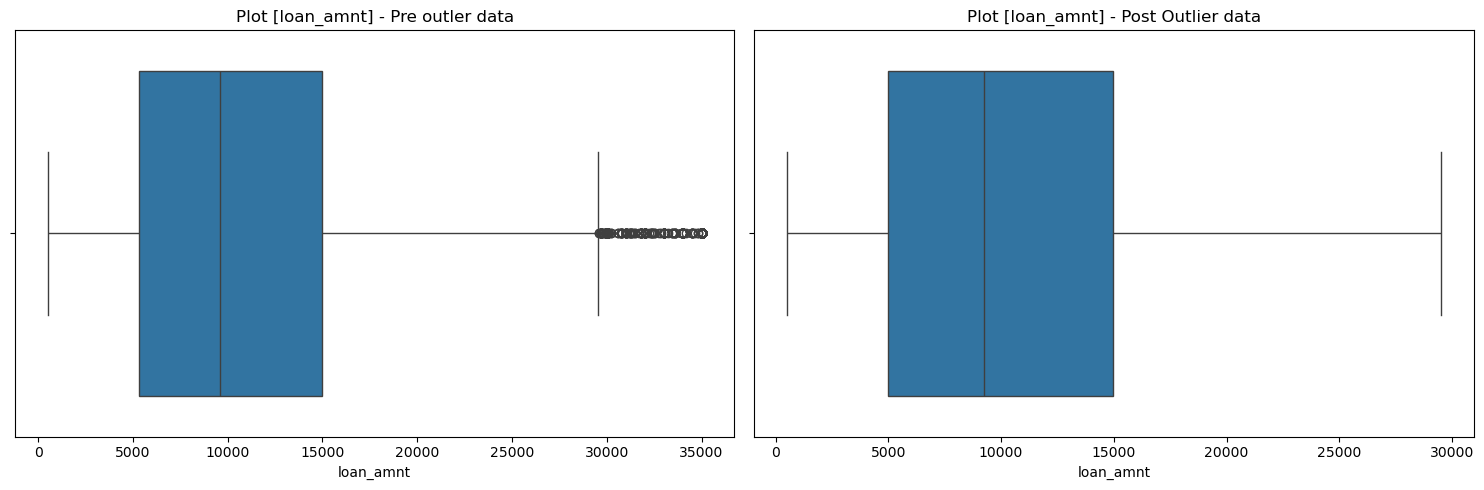

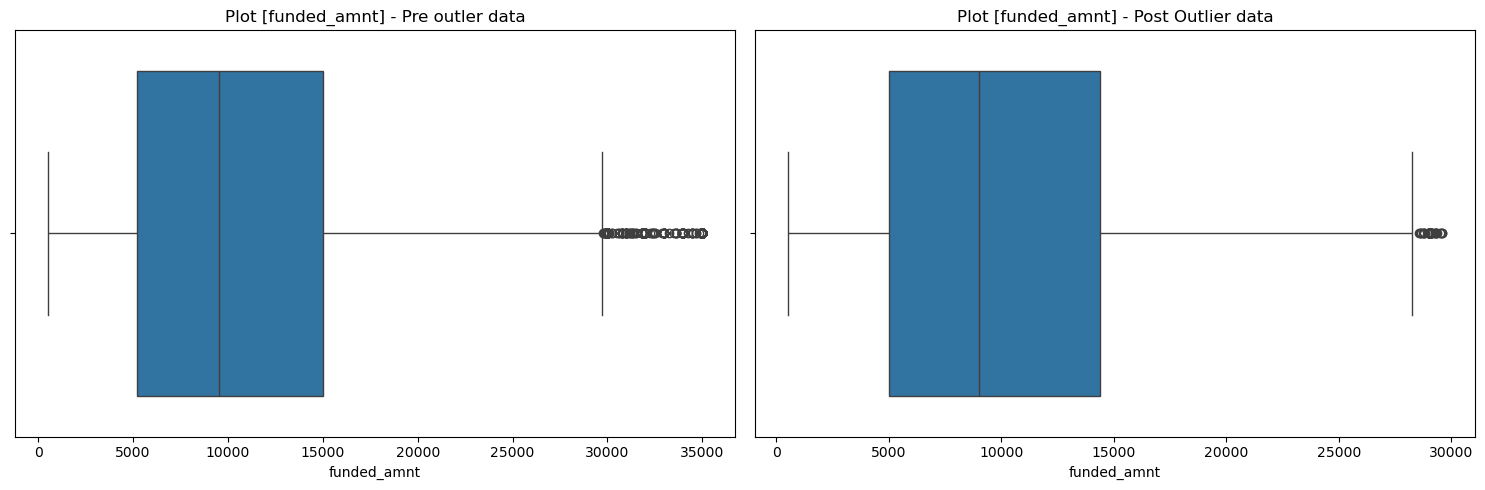

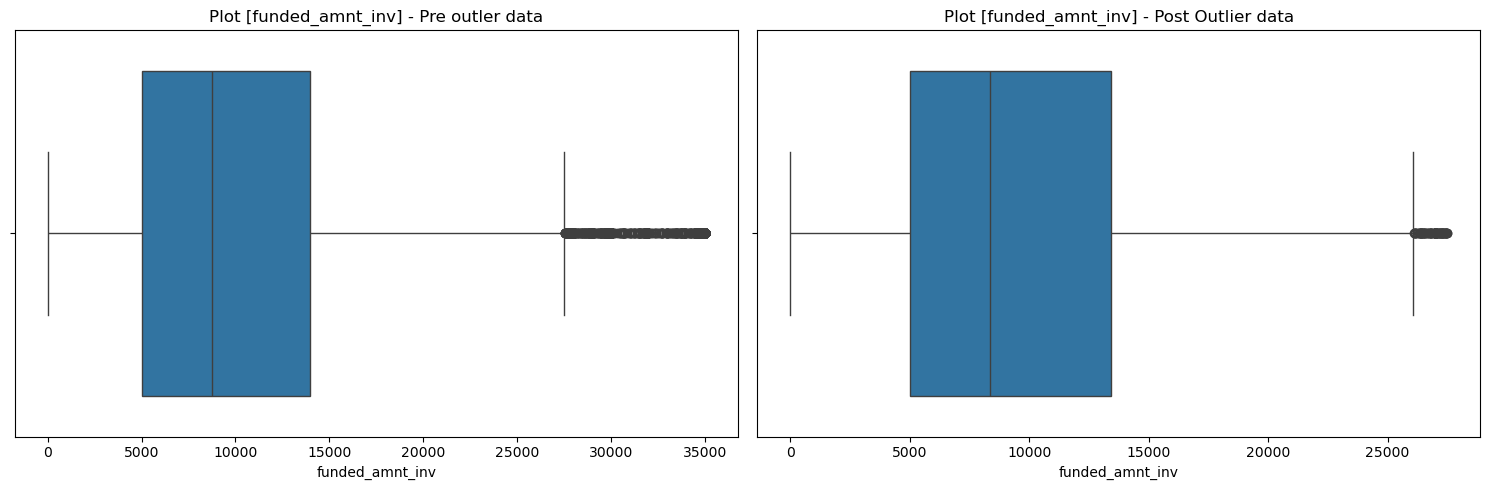

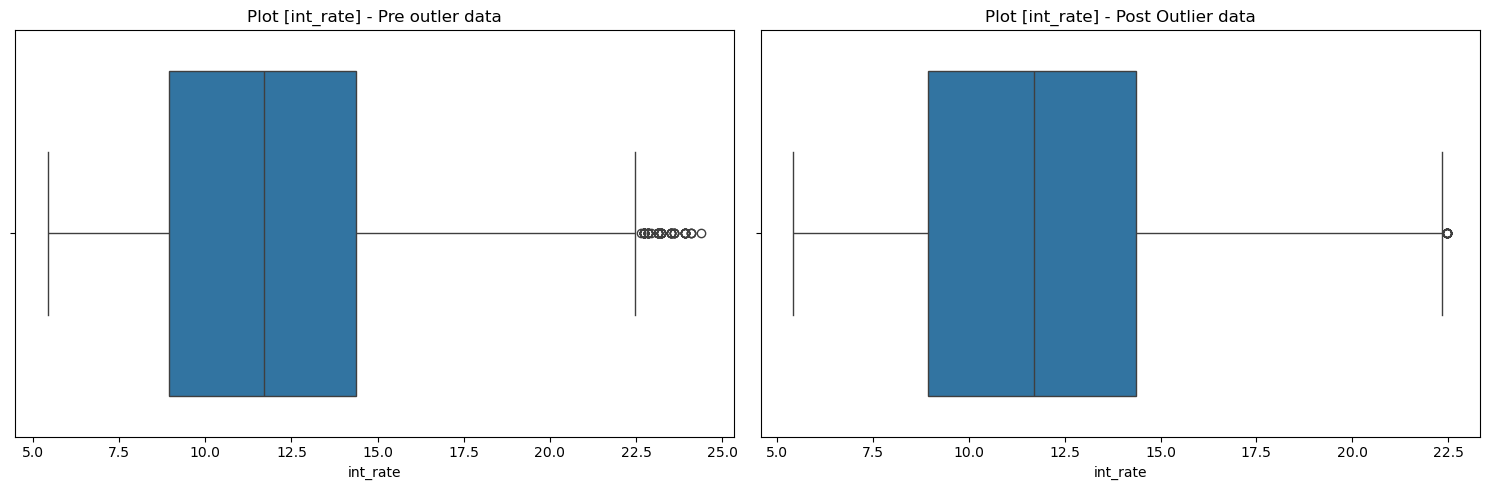

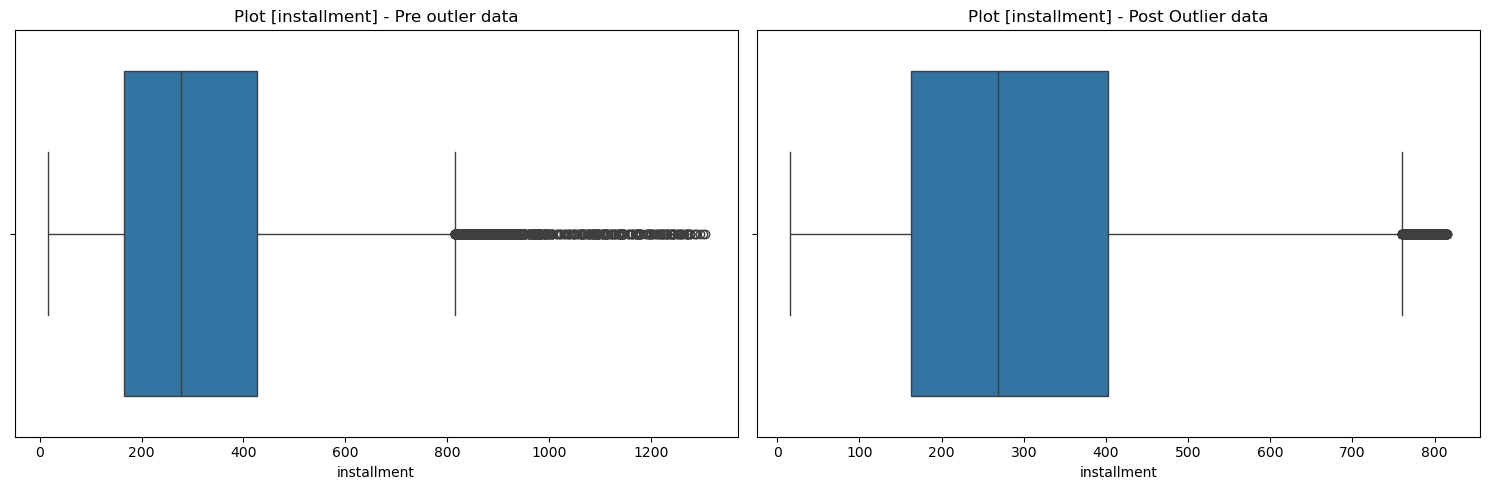

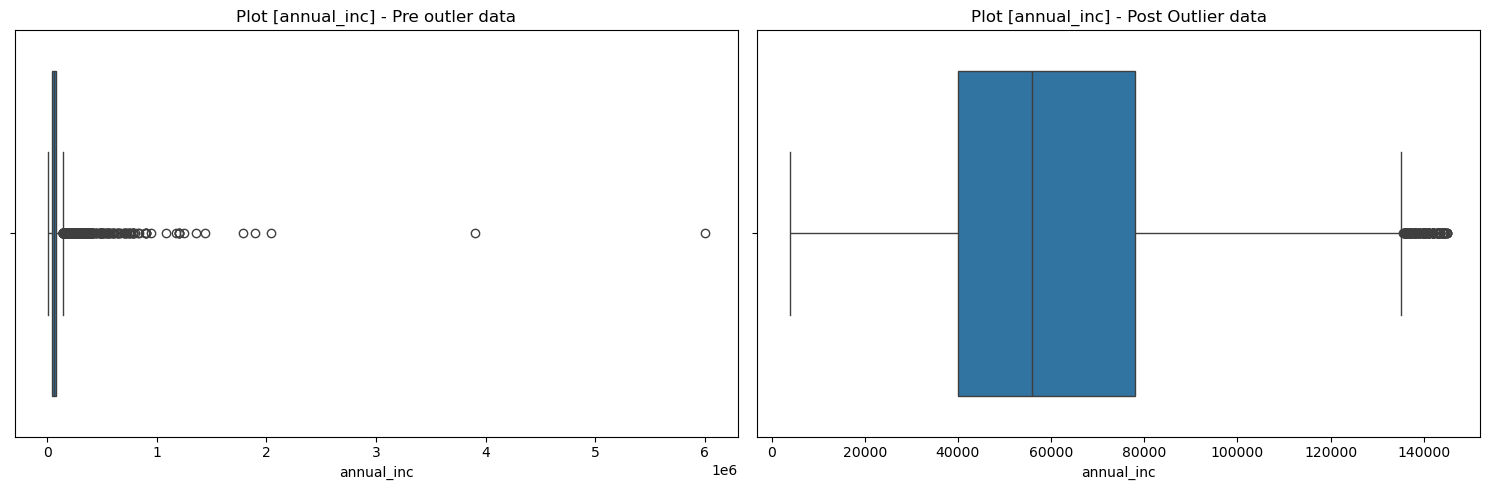

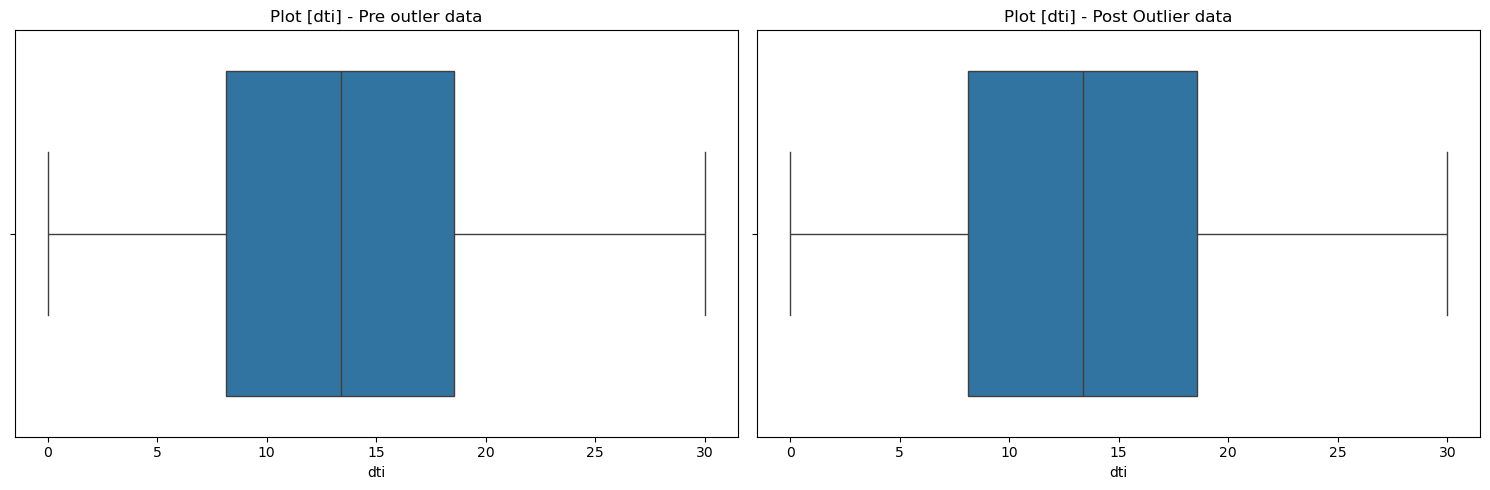

In [63]:
old_rows = len(df)

outlier_columns = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti']

for column in outlier_columns:
    outlier_comparison(df, column)

In [64]:
def remove_outlier_data(df, column):
    old_rows = len(df)
    new_df = df[df[column] < iqr_value(df, column)["upper_fence"]]
    new_rows = len(new_df)
    print(column," rows deleted", old_rows - new_rows)
    print(column,
        "percentage rows deleted: ",
        round((old_rows - new_rows) / old_rows * 100, 2),
        "%",
    )
    return new_df


In [65]:

for column in outlier_columns:
    df = remove_outlier_data(df, column)

loan_amnt  rows deleted 1089
loan_amnt percentage rows deleted:  2.82 %
funded_amnt  rows deleted 161
funded_amnt percentage rows deleted:  0.43 %
funded_amnt_inv  rows deleted 102
funded_amnt_inv percentage rows deleted:  0.27 %
int_rate  rows deleted 62
int_rate percentage rows deleted:  0.17 %
installment  rows deleted 1028
installment percentage rows deleted:  2.77 %
annual_inc  rows deleted 1570
annual_inc percentage rows deleted:  4.34 %
dti  rows deleted 0
dti percentage rows deleted:  0.0 %


In [66]:
new_rows = len(df)
print('Rows dropped: ', old_rows - new_rows)
print('Percentage rows dropped: ', round((old_rows - new_rows)/old_rows*100,2), "%")

Rows dropped:  4012
Percentage rows dropped:  10.4 %


### Univariate analysis


### Annual income

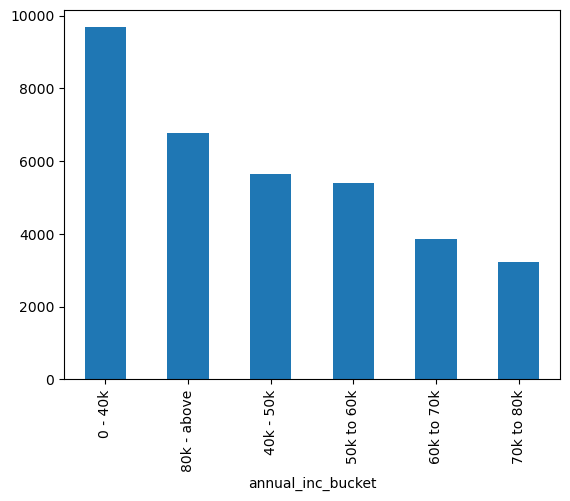

In [69]:
df.annual_inc_bucket.value_counts().plot.bar()
plt.show()

#### loan amount analysis




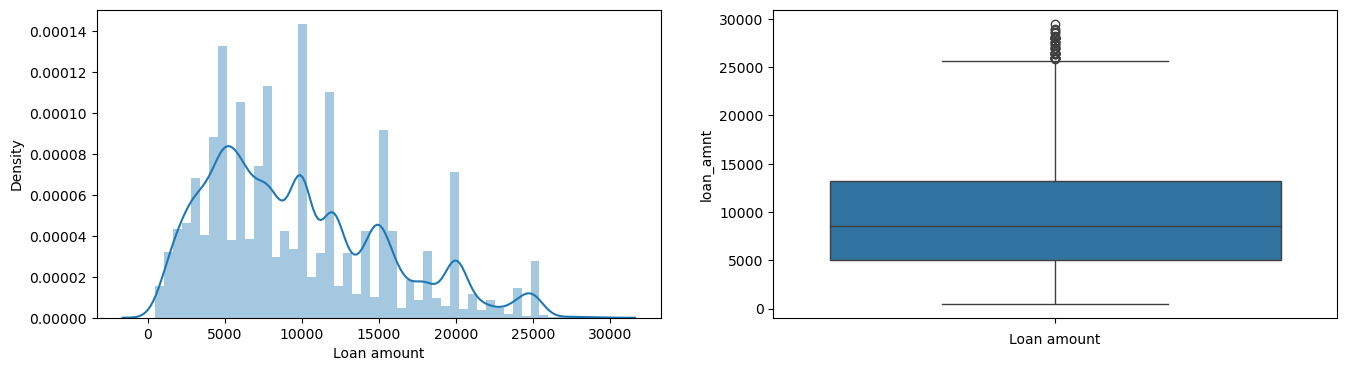

In [71]:
fig, p = plt.subplots(1, 2, figsize=(16, 4))
sns.distplot(
    df.loc[df["loan_amnt"].notnull(), "loan_amnt"], kde=True, hist=True, ax=p[0]
)
sns.boxplot(y='loan_amnt', data=df, ax=p[1])
p[0].set_xlabel("Loan amount")
p[1].set_xlabel("Loan amount")
plt.show()


**Most of the loan amount is in the range of 5000 to 13000 range**

#### funded amount analysis

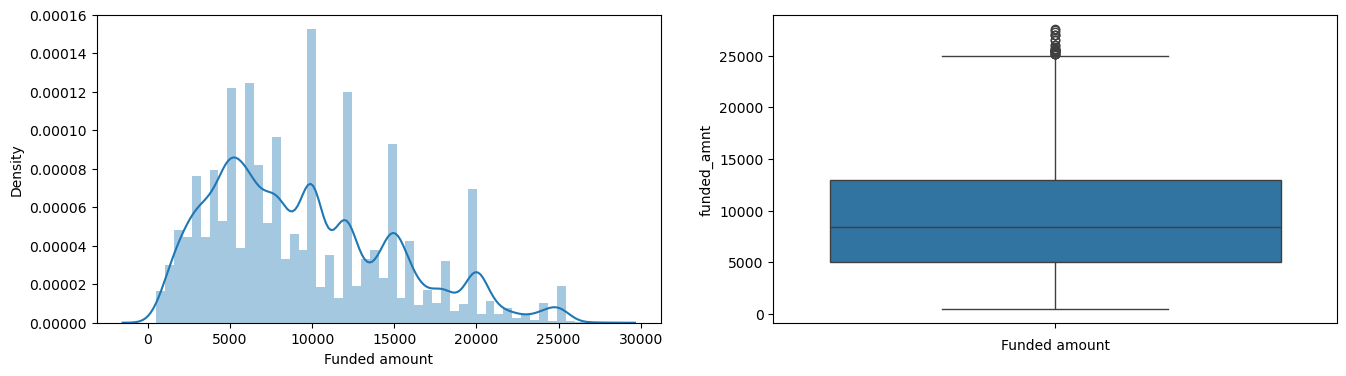

In [74]:
fig, p = plt.subplots(1, 2, figsize=(16, 4))
sns.distplot(
    df.loc[df["funded_amnt"].notnull(), "funded_amnt"], kde=True, hist=True, ax=p[0]
)
sns.boxplot(y="funded_amnt", data=df, ax=p[1])
p[0].set_xlabel("Funded amount")
p[1].set_xlabel("Funded amount")
plt.show()

**Majority of the funded_amnt is in the range of 5000 to 13000**

### funded_amnt_inv

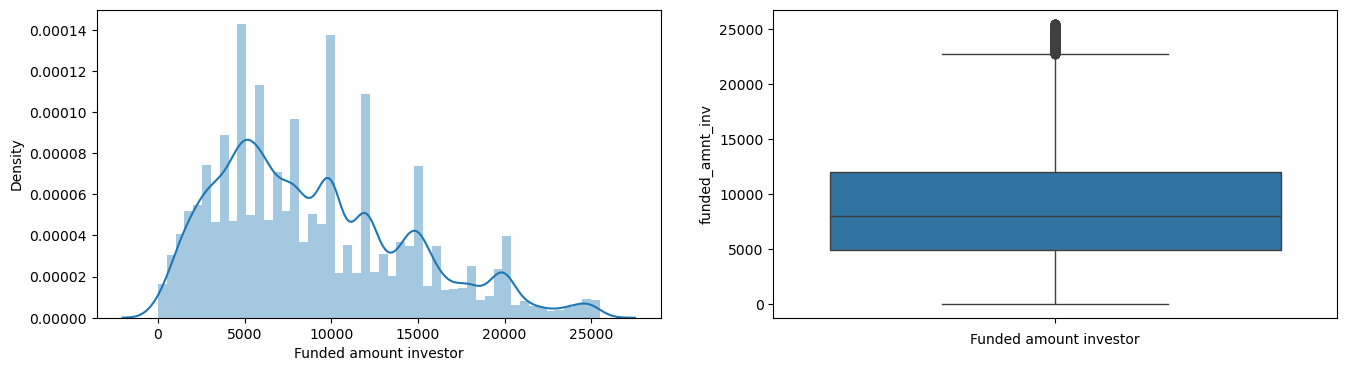

In [77]:
fig, p = plt.subplots(1, 2, figsize=(16, 4))
sns.distplot(
    df.loc[df["funded_amnt_inv"].notnull(), "funded_amnt_inv"], kde=True, hist=True, ax=p[0]
)
sns.boxplot(y="funded_amnt_inv", data=df, ax=p[1])
p[0].set_xlabel("Funded amount investor")
p[1].set_xlabel("Funded amount investor")
plt.show()

**Majority of the funded_amnt_inv is in the range of  5000 to 12000**

### dti

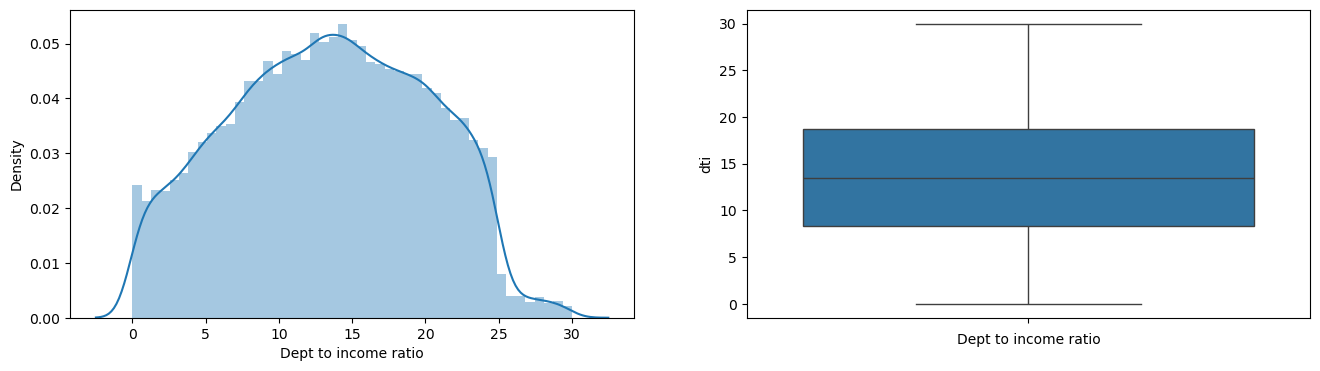

In [80]:
fig, p = plt.subplots(1, 2, figsize=(16, 4))
sns.distplot(
    df.loc[df["dti"].notnull(), "dti"], kde=True, hist=True, ax=p[0]
)
sns.boxplot(y='dti', data=df, ax=p[1])
p[0].set_xlabel("Dept to income ratio")
p[1].set_xlabel("Dept to income ratio")
plt.show()

### Installments

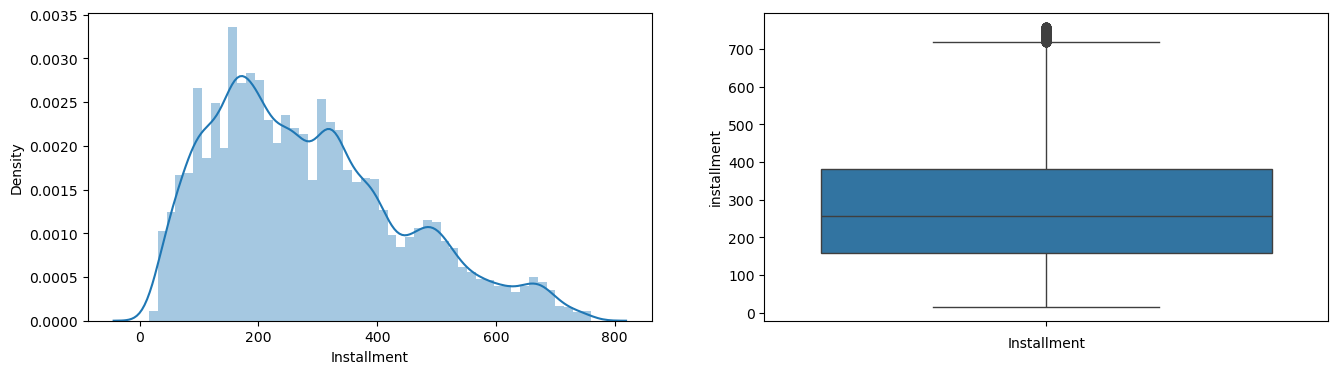

In [82]:
fig, p = plt.subplots(1, 2, figsize=(16, 4))
sns.distplot(
    df.loc[df["installment"].notnull(), "installment"], kde=True, hist=True, ax=p[0]
)
sns.boxplot(y='installment', data=df, ax=p[1])
p[0].set_xlabel("Installment")
p[1].set_xlabel("Installment")
plt.show()

**Most of the installment is between 150 to 380**

### Int_Rate

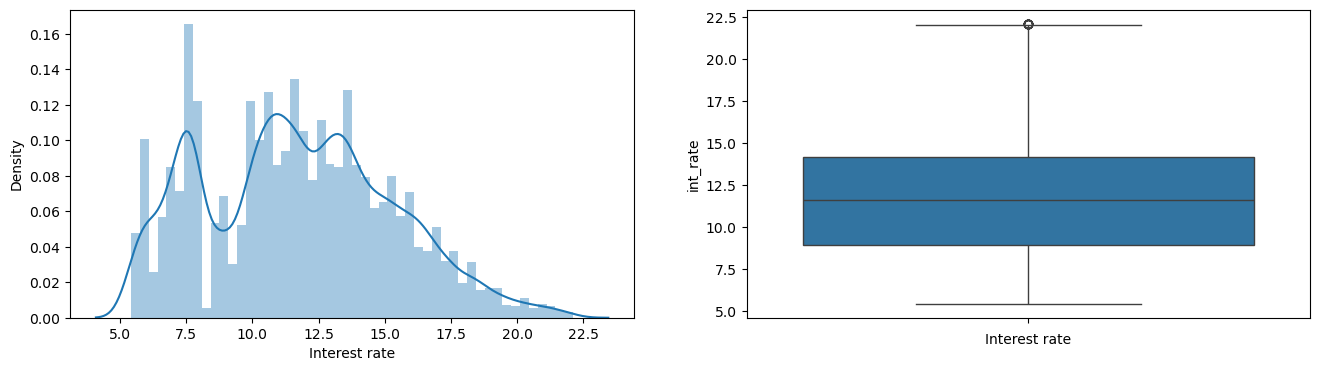

In [85]:
fig, p = plt.subplots(1, 2, figsize=(16, 4))
sns.distplot(
    df.loc[df.int_rate.notnull(), "int_rate"], kde=True, hist=True, ax=p[0]
)
sns.boxplot(y='int_rate', data=df, ax=p[1])
p[0].set_xlabel("Interest rate")
p[1].set_xlabel("Interest rate")
plt.show()

**Majority of the interest rate is in the range of  9% to 14%**

## Unordered Categorical Variable Analysis

### purpose

<Axes: xlabel='purpose'>

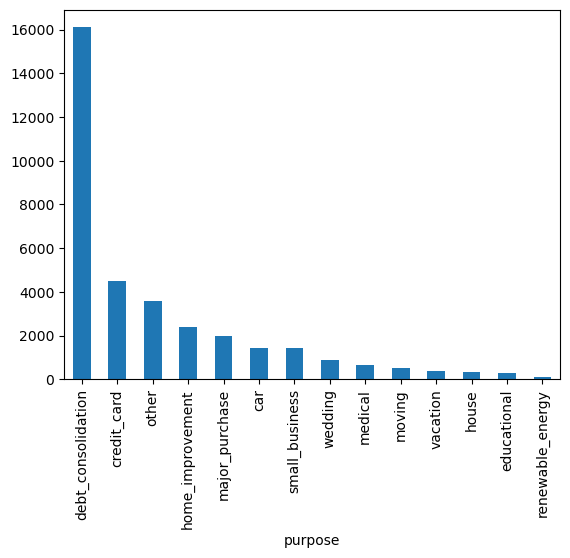

In [88]:
df.purpose.value_counts().plot.bar()

<Axes: xlabel='addr_state'>

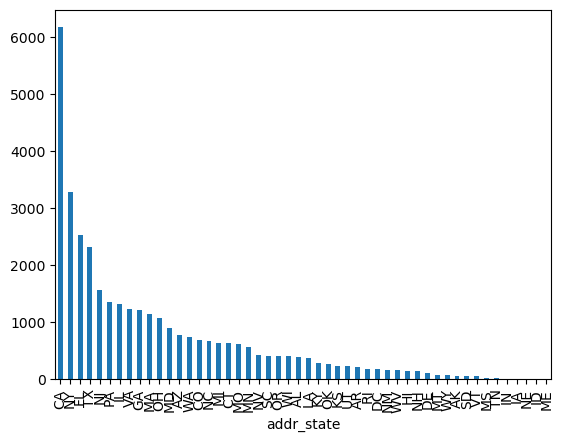

In [89]:
# addr_state represents the state provided by the borrower in the loan application

df.addr_state.value_counts().plot.bar()

<Axes: xlabel='home_ownership'>

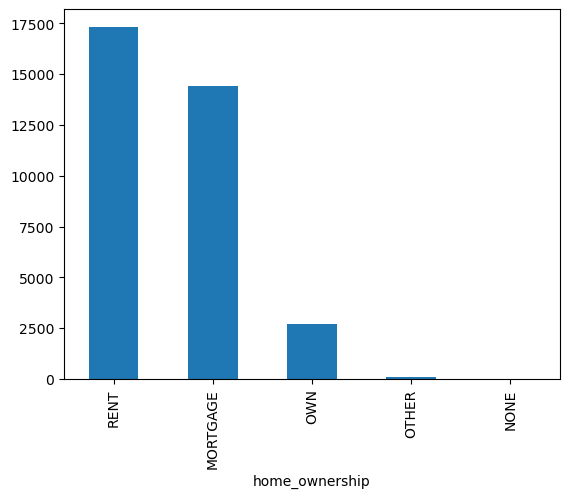

In [90]:
df.home_ownership.value_counts().plot.bar()

### Unorderded categorical variable analysis results

1. Most of the house ownership is rent and mortgage is the close second
2. Most of the purposes of loan is dept consolidation 
3. Most of the applicants are from CA state

### Derived variable analysis

### Issue month

<Axes: xlabel='issue_month'>

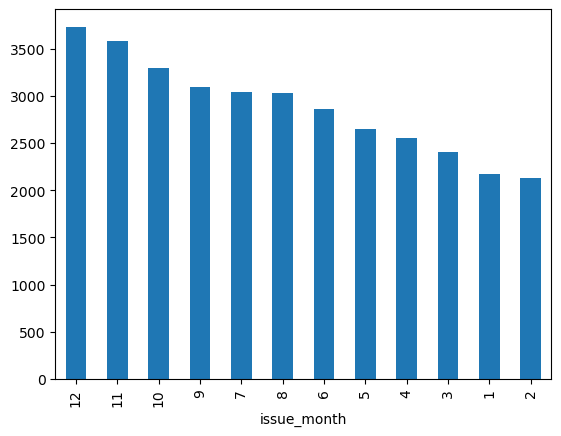

In [94]:
df.issue_month.value_counts().plot.bar()

### Issue year

<Axes: xlabel='issue_year'>

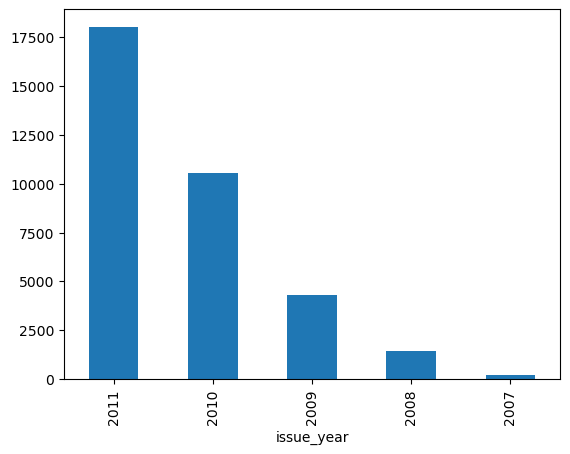

In [96]:
df.issue_year.value_counts().plot.bar()

### issue quarter

<Axes: xlabel='issue_quarter'>

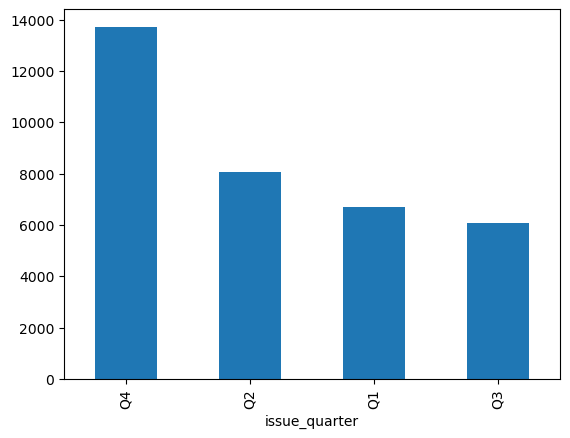

In [98]:
df.issue_quarter.value_counts().plot.bar()

### Univariate analysis summary




1. Most customers earn 60000.0 per year
2. Most customers live in a rented accommodation and morgage comes close second
3. Most customers stay with one employer for more than 10 years
4. Debt to earnings ratio is 0 for most of the customers
5. Maximum number of customers ae from CA state.
6. Most of the loan applicants have an annual income of 0-40 k
7. Most of loans are taken in Q4 in a year
8. Taking loans are increasing year after year
9. least number of loans are taken in Q3

### Corelations

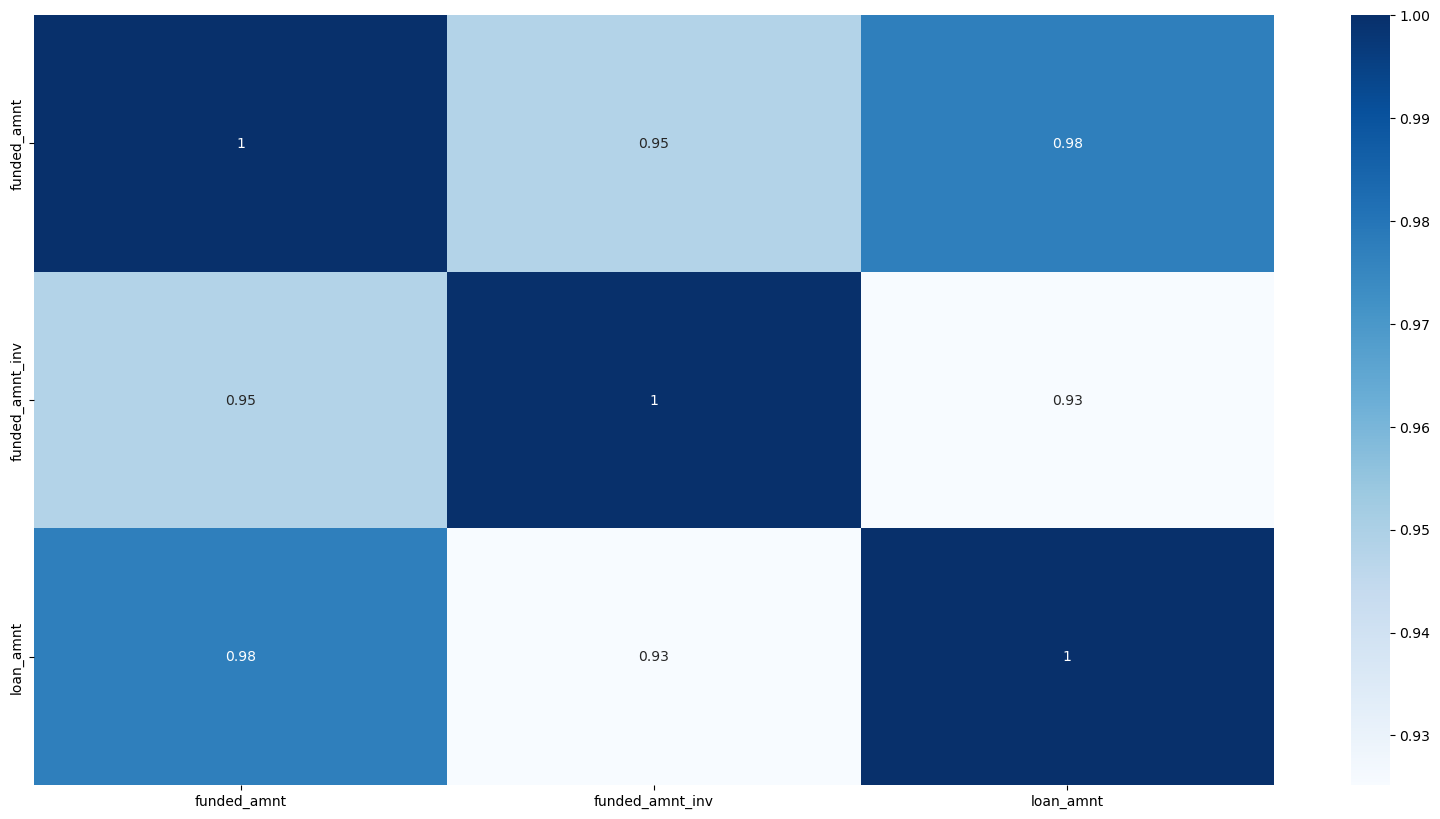

In [102]:
# Identifying key correlations
corr_columns = df.loc[:, ["funded_amnt", "funded_amnt_inv", "loan_amnt"]].corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr_columns, annot=True, cmap="Blues")
plt.show()


### Bivariate analysis